## Copart Challenge
### Team members  - Abhinandan Mohan Raj and Aashesh Vontivillu Nareshchand


In [1]:
# Importing libraries
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline



# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
#importing the dataset
data_df=pd.read_csv('copart_trainset.csv')
data_df.head(20)
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 11 columns):
ID            3400 non-null int64
Feature_1     3400 non-null float64
Feature_2     3400 non-null float64
Feature_3     3400 non-null int64
Feature_4     3400 non-null int64
Feature_5     3400 non-null int64
Feature_6     3400 non-null int64
Feature_7     3400 non-null int64
Feature_8     3400 non-null int64
Feature_9     3400 non-null int64
Feature_10    3400 non-null int64
dtypes: float64(2), int64(9)
memory usage: 292.3 KB


## Data Preprocessing


In [3]:
data_df.isnull().sum()

ID            0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
dtype: int64

In [4]:
data_df['Feature_5'] = data_df['Feature_5'].astype(str)
data_df['Feature_6'] = data_df['Feature_6'].astype(str)
data_df['Feature_7'] = data_df['Feature_7'].astype(str)
data_df['Feature_8'] = data_df['Feature_8'].astype(str)


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 11 columns):
ID            3400 non-null int64
Feature_1     3400 non-null float64
Feature_2     3400 non-null float64
Feature_3     3400 non-null int64
Feature_4     3400 non-null int64
Feature_5     3400 non-null object
Feature_6     3400 non-null object
Feature_7     3400 non-null object
Feature_8     3400 non-null object
Feature_9     3400 non-null int64
Feature_10    3400 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 292.3+ KB


In [6]:
#Descriptive statistics for the dataset
data_df.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_9,Feature_10
count,3400.000000,3400.000000,3400.000000,3.400000e+03,3400.000000,3400.000000,3400.000000
mean,2038.315588,7778.867789,9385.635912,8.853750e+04,1556.451471,6.443824,4227.301471
std,1171.303133,5618.523416,6774.128577,6.984592e+04,439.146095,4.333863,3700.992214
min,1.000000,1.190000,9.000000,5.000000e+00,698.000000,0.000000,125.000000
25%,1022.750000,4199.986000,5269.600000,2.395625e+04,1242.000000,2.000000,1800.000000
50%,2042.500000,6181.597800,7728.900000,8.105550e+04,1498.000000,7.000000,3050.000000
75%,3065.250000,9599.968000,11269.925000,1.341432e+05,1896.000000,10.000000,5400.000000
max,4023.000000,90756.300000,98334.600000,1.058105e+06,5462.000000,25.000000,51500.000000


In [7]:
#dropping 'ID' column as we have index
data_df.drop(['ID'] , axis=1 , inplace=True)
data_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,5200.062,7161.0,169744,999,17,25,26,6,11,1850
1,9520.000,5217.0,116888,999,17,2,0,6,8,4400
2,13685.000,6827.0,118415,999,14,21,134,6,9,4850
3,6426.000,2769.0,95160,999,17,24,76,6,8,3100
4,10353.000,10912.0,82558,1390,7,32,183,6,7,3400


### Data Visualisation of features

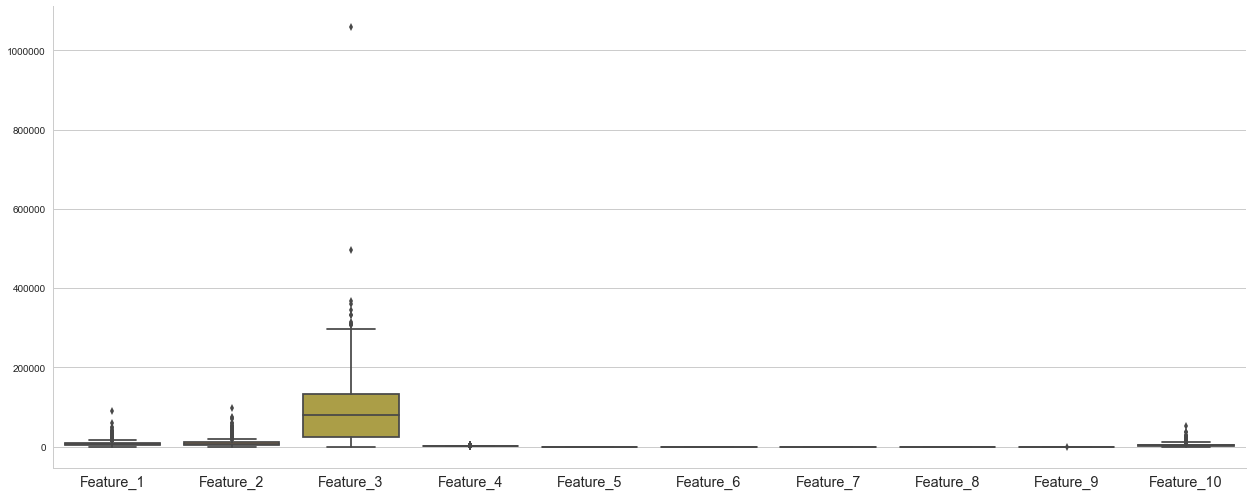

In [8]:
sns.factorplot(data=data_df , kind='box' , size=7, aspect=2.5)

### Distribution of Categorical variables

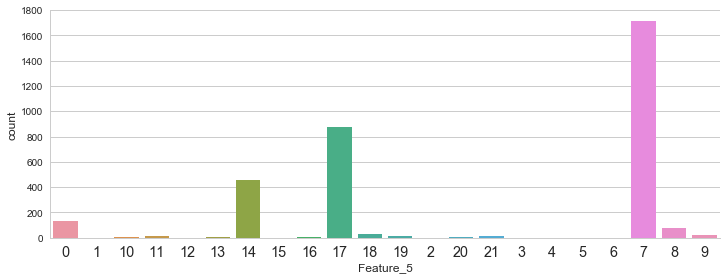

In [9]:
###Feature 5 destribution
sns.factorplot(x='Feature_5', data=data_df , kind='count',aspect=2.5 )

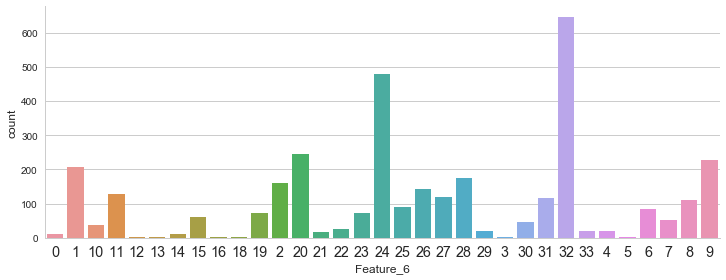

In [10]:
#Feature 6 Distribution
sns.factorplot(x='Feature_6', data=data_df , kind='count',aspect=2.5 )

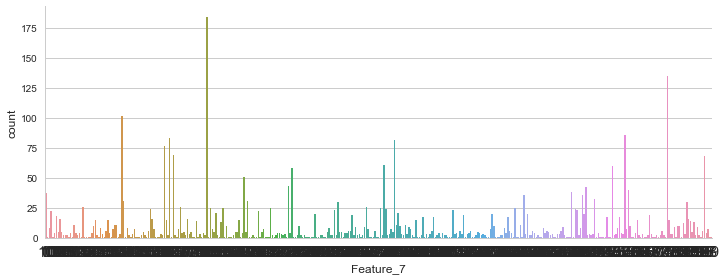

In [11]:
#Feature 7 Distribution
sns.factorplot(x='Feature_7', data=data_df , kind='count',aspect=2.5 )

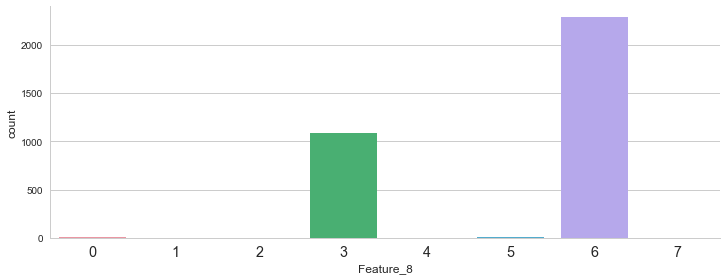

In [12]:
#Feaute 8 Distribution
sns.factorplot(x='Feature_8', data=data_df , kind='count',aspect=2.5 )

### Feature engineering

In [9]:
len(data_df[(data_df['Feature_9']==0)])

301

In [10]:
#droppping zeroes in Feature_9
data_df = data_df[(data_df[['Feature_9']] != 0).all(axis=1)]

In [11]:
#Removing the zeroes in 'Feature_9'
len(data_df[(data_df['Feature_9']==0)])

0

In [12]:
data_df_copy=data_df.copy()

In [13]:
#reducing the low frequency categories by grouping to a common value '0'
series_5 = data_df_copy['Feature_5'].value_counts()
series_6 = data_df_copy['Feature_6'].value_counts()
series_7 = data_df_copy['Feature_7'].value_counts()
series_8 = data_df_copy['Feature_8'].value_counts()
# mask = (series/series.sum() * 100).lt(1)

mask_5 = (series_5/series_5.sum() * 100).lt(1)
mask_6 = (series_6/series_6.sum() * 100).lt(1)
mask_7 = (series_7/series_7.sum() * 100).lt(1)
mask_8 = (series_8/series_8.sum() * 100).lt(1)

data_df_copy['Feature_5'] = np.where(data_df_copy['Feature_5'].isin(series_5[mask_5].index),'0',data_df_copy['Feature_5'])
data_df_copy['Feature_6'] = np.where(data_df_copy['Feature_6'].isin(series_6[mask_6].index),'0',data_df_copy['Feature_6'])
data_df_copy['Feature_7'] = np.where(data_df_copy['Feature_7'].isin(series_7[mask_7].index),'0',data_df_copy['Feature_7'])
data_df_copy['Feature_8'] = np.where(data_df_copy['Feature_8'].isin(series_8[mask_8].index),'0',data_df_copy['Feature_8'])



In [14]:
data_df_copy['Feature_8'].value_counts()


6    2075
3    1003
0      21
Name: Feature_8, dtype: int64

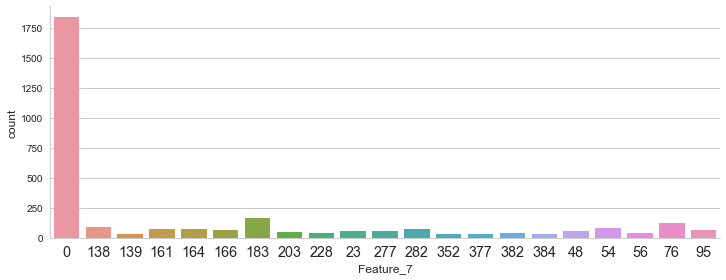

In [19]:
#Feature 7 Distribution after grouping the less frequent categorical variables
sns.factorplot(x='Feature_7', data=data_df_copy , kind='count',aspect=2.5 )

In [15]:
#Splitting into the train and test datasets
y=data_df_copy.iloc[:, 9].values
X=data_df_copy.iloc[:, 0:9].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)



In [19]:
#Normalising the feature variables

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
np.shape(X_train)

(2479, 9)

In [16]:
X_train = pd.get_dummies(X_train)   # gives (1451, 221)  
X_test = pd.get_dummies(X_test)    # gives (1459, 206)  
final_train, final_test = train.align(test, join='inner', axis=1)  # inner join

Exception: Data must be 1-dimensional

In [22]:
# Encoding categorical data by one-hot encoder to dummy variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:, 4] = labelencoder.fit_transform(X_train[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X_train = onehotencoder.fit_transform(X_train).toarray()

X_train[:, 5] = labelencoder.fit_transform(X_train[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [5])
X_train = onehotencoder.fit_transform(X_train).toarray()

X_train[:, 6] = labelencoder.fit_transform(X_train[:, 6])
onehotencoder = OneHotEncoder(categorical_features = [6])
X_train = onehotencoder.fit_transform(X_train).toarray()

X_train[:, 7] = labelencoder.fit_transform(X_train[:, 7])
onehotencoder = OneHotEncoder(categorical_features = [7])
X_train = onehotencoder.fit_transform(X_train).toarray()

    
np.shape(X_train)


(2479, 885)

In [25]:
# Collect all R2 Scores. Initialising the models to be used

R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [26]:
##Linear Regression

clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
R2_Scores



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


ValueError: shapes (620,9) and (885,) not aligned: 9 (dim 1) != 885 (dim 0)

In [31]:
###Lasso Regression

clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
R2_Scores




###### Lasso Regression ######
Score : 0.6306
[0.62330782 0.63686877 0.57368921 0.54987179 0.59502508]

MSE    : 3911188.25 
MAE    : 1330.29 
RMSE   : 1977.67 
R2     : 0.63 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[0.6333626979311009, 0.6306124293338105]

In [32]:
###Ada Boost Regression

clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
R2_Scores




###### AdaBoost Regression ######
Score : 0.7465
[0.70580799 0.57060924 0.6816492  0.66248965 0.68515461]

MSE    : 2684593.94 
MAE    : 1196.03 
RMSE   : 1638.47 
R2     : 0.75 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


[0.6333626979311009, 0.6306124293338105, 0.7464566851599238]

In [33]:
###Ridge Regression

clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
R2_Scores




###### Ridge Regression ######
Score : 0.5051
[0.49924053 0.50896559 0.4796716  0.42739998 0.51211915]

MSE    : 5239670.04 
MAE    : 1446.03 
RMSE   : 2289.03 
R2     : 0.51 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[0.6333626979311009,
 0.6306124293338105,
 0.7464566851599238,
 0.5051455308792512]

In [34]:
###Gradient Boost Regression

clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
R2_Scores



      Iter       Train Loss   Remaining Time 
         1    10196137.7440            0.10s
         2     9474660.4154            0.10s
         3     8883459.6199            0.06s
         4     8390495.0240            0.07s
         5     7987172.1820            0.09s
         6     7649674.3394            0.08s
         7     7355060.4618            0.08s
         8     7116423.2210            0.08s
         9     6908434.2278            0.08s
        10     6708559.9073            0.08s
        20     5389690.0201            0.05s
        30     4739860.0633            0.05s
        40     4353783.3465            0.04s
        50     4102064.2915            0.04s
        60     3927911.0432            0.03s
        70     3805031.7533            0.02s
        80     3714334.7125            0.01s
        90     3642788.5092            0.01s
       100     3583316.4974            0.00s
      Iter       Train Loss   Remaining Time 
         1    10141097.3733            0.00s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[0.6333626979311009,
 0.6306124293338105,
 0.7464566851599238,
 0.5051455308792512,
 0.6505839303349221]

In [35]:
####Random Forest Regression

clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
R2_Scores


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished



###### Random Forest ######
Score : 0.8164
[0.73690185 0.75638376 0.75394723 0.7423466  0.75608744]

MSE    : 1943604.60 
MAE    : 922.28 
RMSE   : 1394.13 
R2     : 0.82 
Score : 0.8430
R2     : 0.84 


[0.6333626979311009,
 0.6306124293338105,
 0.7464566851599238,
 0.5051455308792512,
 0.6505839303349221,
 0.8429908078248844]

In [36]:
###Kneighbor Regression

clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
R2_Scores



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished



###### KNeighbours Regression ######
Score : 0.7584
[0.76788476 0.65985601 0.7103934  0.62893669 0.61782954]

MSE    : 2557952.78 
MAE    : 1044.85 
RMSE   : 1599.36 
R2     : 0.76 
Score : 0.7584
R2     : 0.76 


[0.6333626979311009,
 0.6306124293338105,
 0.7464566851599238,
 0.5051455308792512,
 0.6505839303349221,
 0.8429908078248844,
 0.758417160383905]

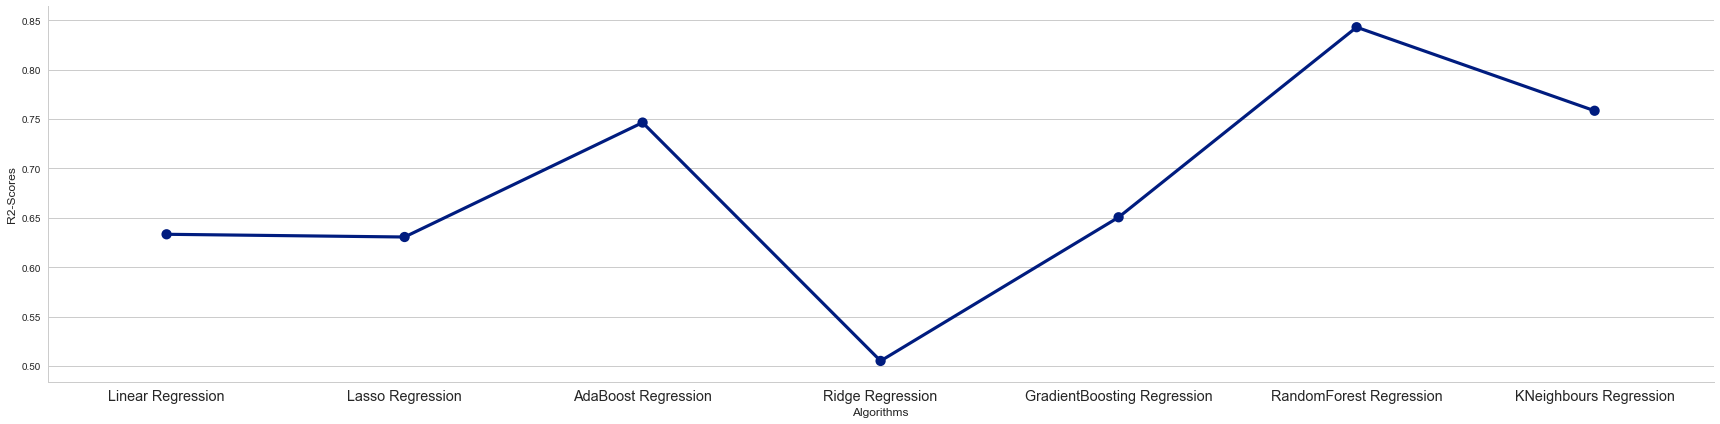

In [37]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

In [38]:
#importing the to-predict dataset
to_pred_df=pd.read_csv('Copart_to_predict.csv')

to_pred_df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,4024,35378.2,11118.6,4208,1595,17,20,95,6,0,NaN
1,4025,10115.0,13584.6,169255,3123,7,1,60,6,12,NaN
2,4026,5771.5,3537.9,122694,1896,7,32,347,3,13,NaN
3,4027,7378.0,14100.0,154432,1796,17,20,96,6,13,NaN
4,4028,3094.0,2982.8,89137,1390,0,27,203,6,13,NaN


In [39]:
X_to_pred=to_pred_df.iloc[:, 0:9].values
X_to_pred


array([[4.024000e+03, 3.537820e+04, 1.111860e+04, ..., 2.000000e+01,
        9.500000e+01, 6.000000e+00],
       [4.025000e+03, 1.011500e+04, 1.358460e+04, ..., 1.000000e+00,
        6.000000e+01, 6.000000e+00],
       [4.026000e+03, 5.771500e+03, 3.537900e+03, ..., 3.200000e+01,
        3.470000e+02, 3.000000e+00],
       ...,
       [4.448000e+03, 1.799994e+03, 2.305000e+03, ..., 2.200000e+01,
        3.260000e+02, 6.000000e+00],
       [4.449000e+03, 6.545000e+03, 5.673500e+03, ..., 3.200000e+01,
        2.780000e+02, 3.000000e+00],
       [4.450000e+03, 2.046800e+04, 2.650000e+04, ..., 2.000000e+01,
        4.800000e+01, 6.000000e+00]])

In [40]:
####Random Forest Regression

y_to_pred = clf_rf.predict(X_to_pred)

# y_pred

for x in y_to_pred:
    print(int(x))




7494
7486
7494
7494
7651
7486
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7486
7494
7494
7494
7494
7494
7494
7494
7651
7494
7494
7494
7494
7494
7651
7494
7494
7494
7494
7486
7642
7494
7494
7651
7494
7486
7494
7642
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7486
7494
7486
7494
7494
7651
7494
7486
7494
7494
7494
7494
7486
7494
7494
7494
7494
7494
7486
7486
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7486
7486
7494
7494
7494
7651
7494
7494
7494
7494
7494
7494
7486
7494
7486
7494
7494
7494
7494
7494
7494
7494
7486
7494
7494
7494
7558
7494
7494
7486
7494
7494
7494
7494
7486
7494
7486
7494
7494
7494
7486
7494
7486
7651
7494
7494
7494
7486
7494
7486
7494
7494
7486
7494
7494
7494
7494
7494
7494
7494
7651
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7486
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7494
7642
7494
7494
7494
7494
7494
7494
7486
7486
7486
7486
7494
7494
7494
7486
7494
7486
7486
7494
7494
7486
7651
7651
7494


In [41]:
#writing the predicted values to excel
import openpyxl
wb=openpyxl.load_workbook("Copart_to_predict.xlsx")
ws=wb.get_sheet_by_name("Sheet1")
print(ws.cell(row=2,column=5).value)
row_no=2
col_no=11
for y in y_to_pred:
        ws.cell(row=row_no,column=col_no).value=y
        row_no+=1

wb.save("Copart_to_predict.xlsx")

1595


C:\Users\abhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  after removing the cwd from sys.path.
